In [263]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [264]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [265]:
df.shape

(4177, 9)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Datatypes

In [267]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here, datatype of Sex is object. So we need to change its type to int of float for better handling.

# Checking the Missing Values

In [268]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

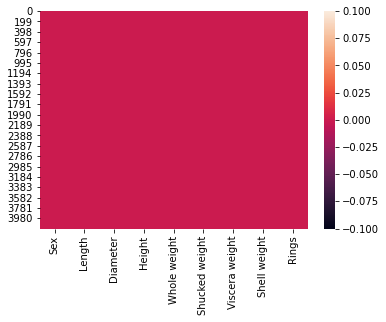

In [269]:
sns.heatmap(df.isnull())

There are no missing values in our dataset.

In [270]:
from sklearn.preprocessing import LabelEncoder

In [271]:
label_sex = LabelEncoder()
df['Sex'] = label_sex.fit_transform(df['Sex'])

In [272]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Here, we have 1528 Male abalone, 1307 Females and 1342 Infants.

In [273]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Data Visualization

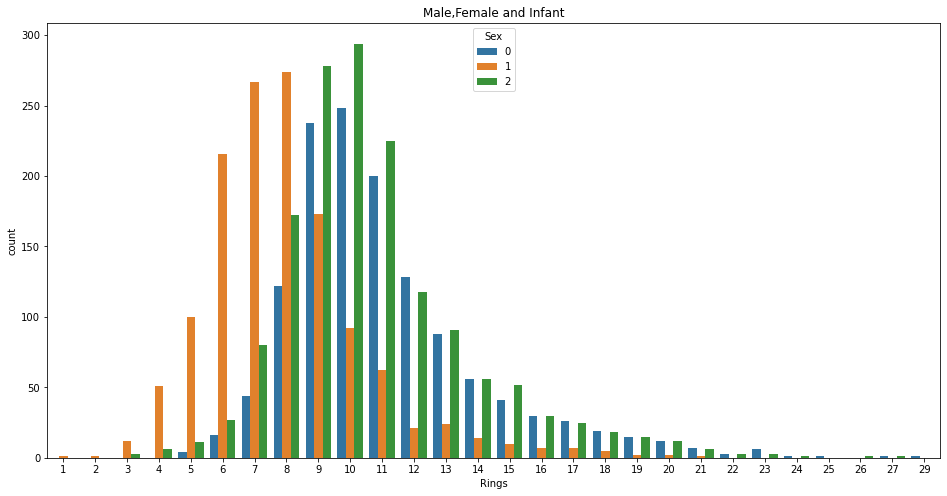

In [274]:
plt.figure(figsize=(16,8))
sns.countplot(x='Rings',data=df,hue="Sex")
plt.title("Male,Female and Infant")
plt.show()

# Correlation

<AxesSubplot:>

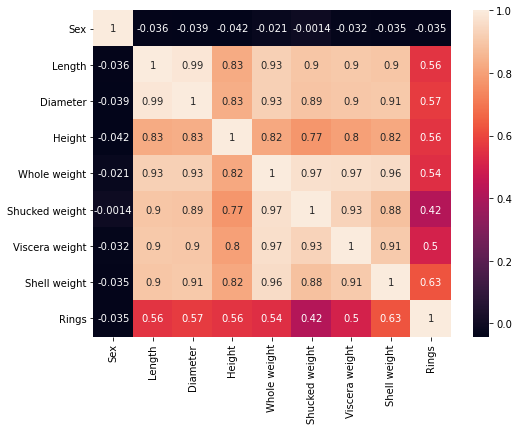

In [275]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(8,6))
sns.heatmap(df[top_features].corr(),annot=True)

Dropping Length and Diameter, as they are highly correlated and similar correlation with Rings

In [276]:
df.drop(['Length'],axis=1,inplace=True)

In [277]:
df.head()

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking Outliers

In [278]:
df.columns

Index(['Sex', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

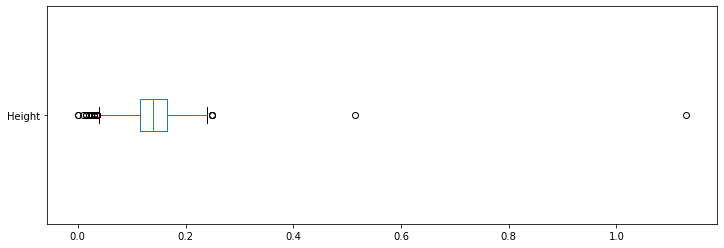

In [279]:
plt.figure(figsize=(12,4))
df['Height'].plot.box(vert=False)
plt.show()

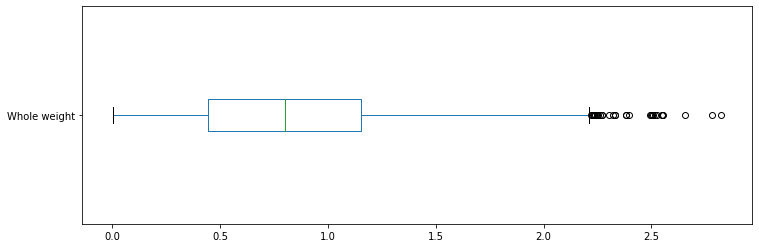

In [280]:
plt.figure(figsize=(12,4))
df['Whole weight'].plot.box(vert=False)
plt.show()

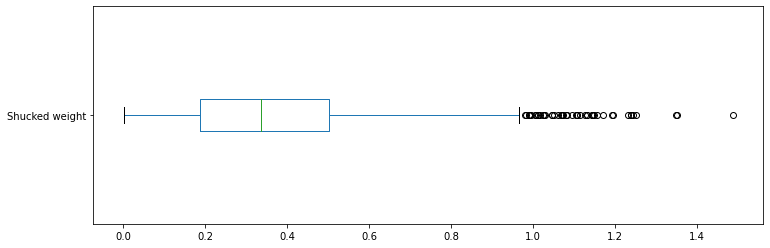

In [281]:
plt.figure(figsize=(12,4))
df['Shucked weight'].plot.box(vert=False)
plt.show()

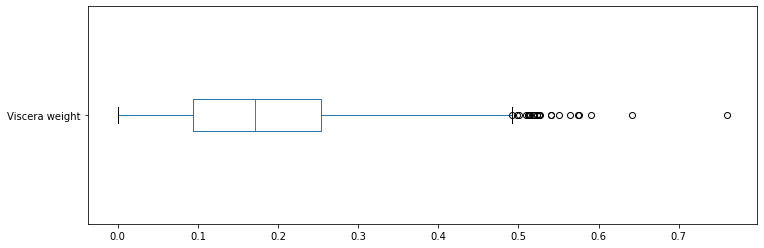

In [282]:
plt.figure(figsize=(12,4))
df['Viscera weight'].plot.box(vert=False)
plt.show()

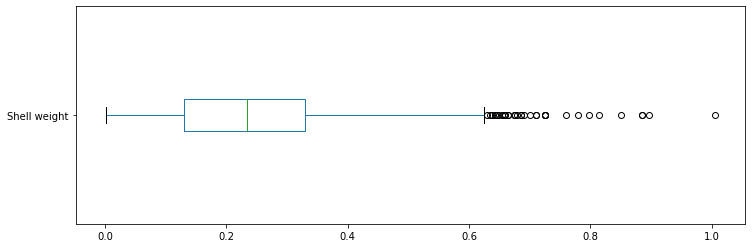

In [283]:
plt.figure(figsize=(12,4))
df['Shell weight'].plot.box(vert=False)
plt.show()

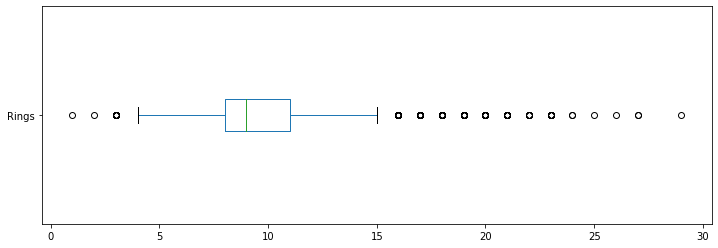

In [284]:
plt.figure(figsize=(12,4))
df['Rings'].plot.box(vert=False)
plt.show()

# Checking skewness

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

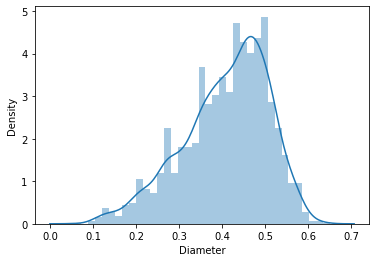

In [285]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

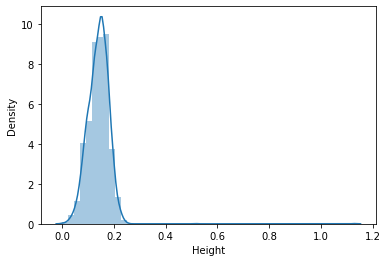

In [286]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

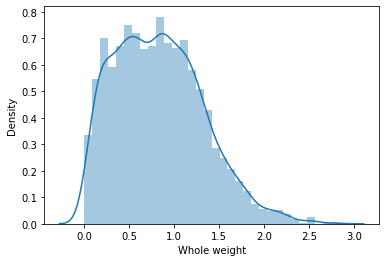

In [287]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

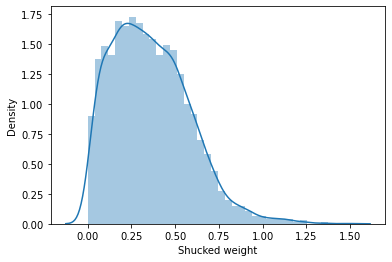

In [288]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

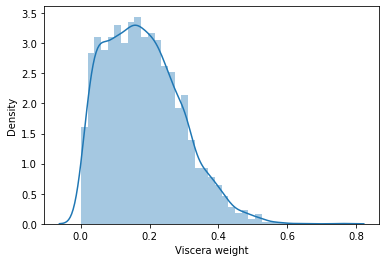

In [289]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

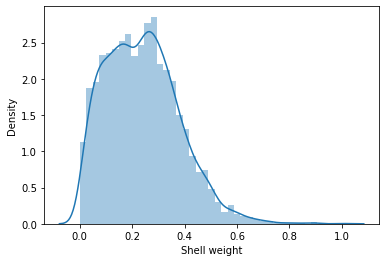

In [290]:
sns.distplot(df['Shell weight'])

In [291]:
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Skewness is more than +0.5 or less -0.5 needs to be treated.

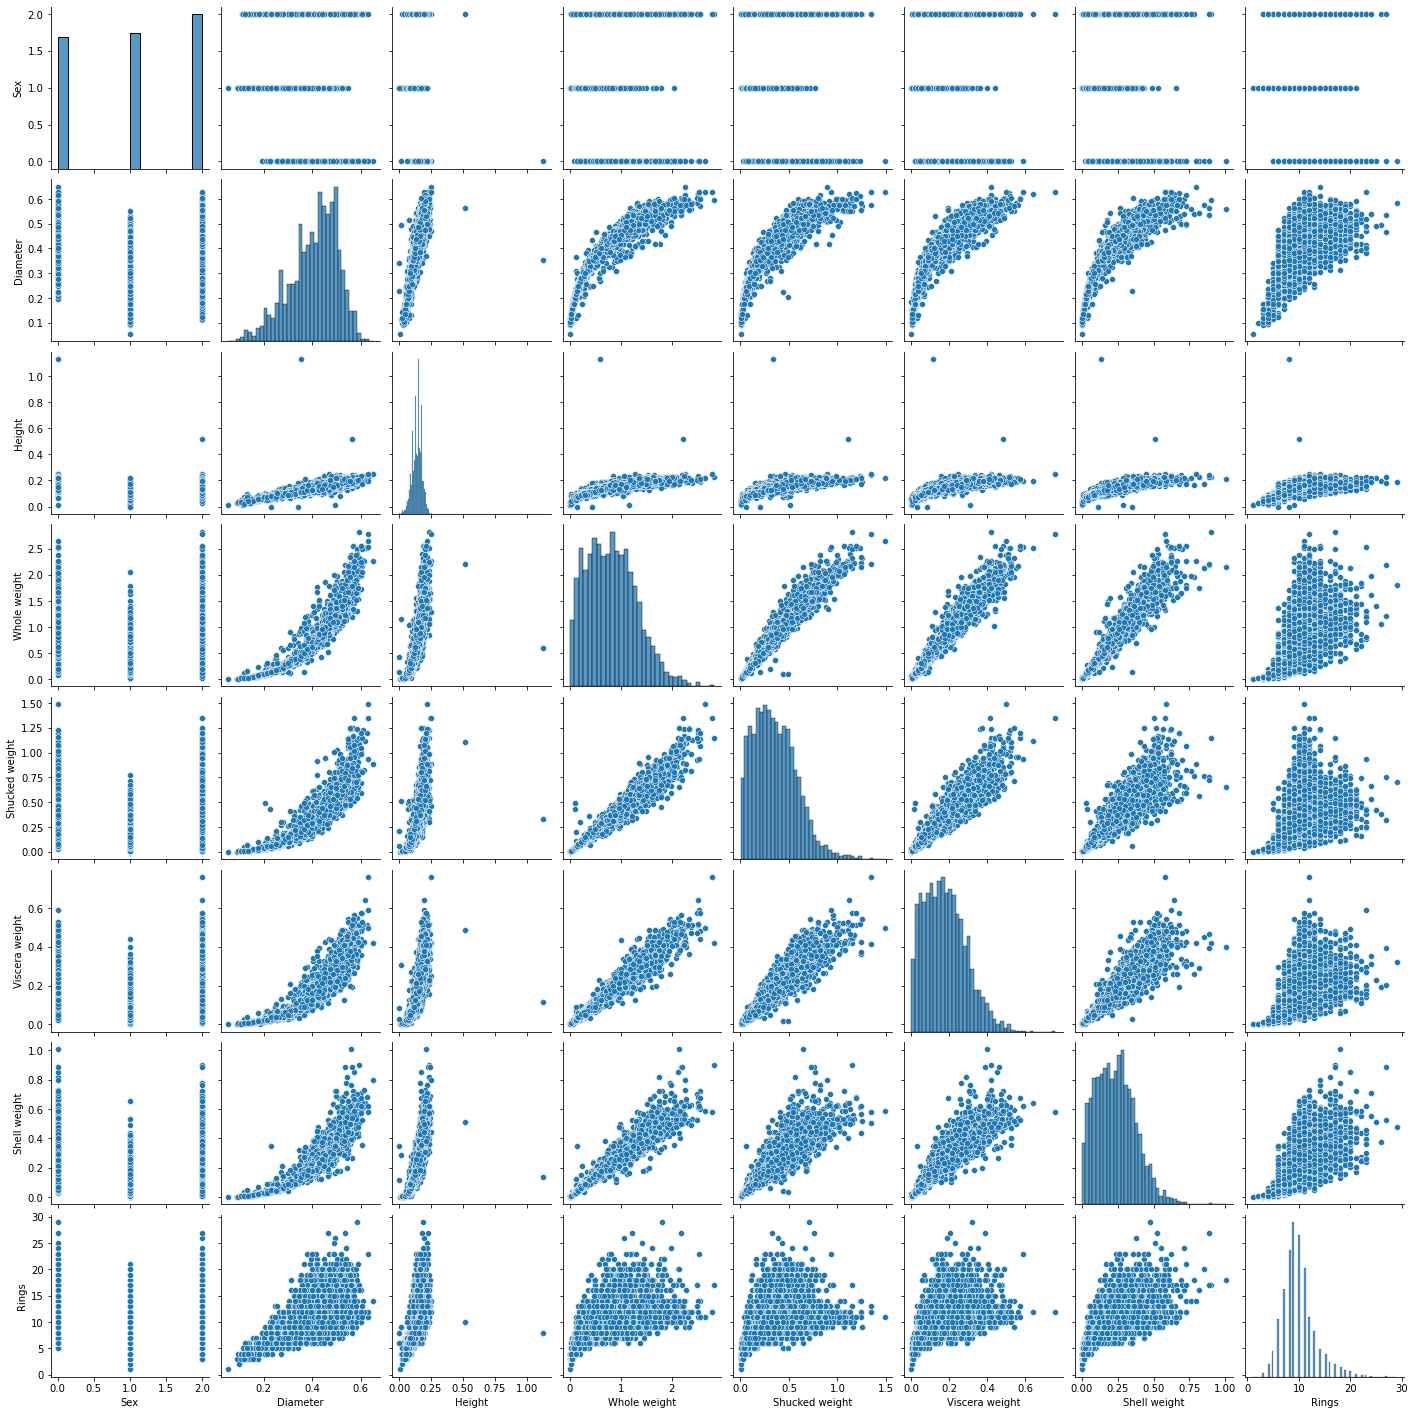

In [292]:
sns.pairplot(df)

# Remove Outliers

In [293]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [294]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 8)
(4031, 8)


# Percentage of Data Loss

In [295]:
loss_of_data=(4177-4031)/4177*100
print(loss_of_data)

3.4953315776873355


# Checking skewness after Outlier Removal

In [296]:
df_new.skew()

Sex              -0.095221
Diameter         -0.607953
Height           -0.257638
Whole weight      0.333060
Shucked weight    0.457151
Viscera weight    0.436022
Shell weight      0.347931
Rings             0.721415
dtype: float64

# Splitting data in X and Y

In [297]:
X=df_new.drop(['Rings','Sex'],axis=1)
Y=df_new['Rings']

# Scaling the Data

In [317]:
#Lets fring all features to a common scale

from sklearn.preprocessing import MinMaxScaler
mms=StandardScaler()
x=mms.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.415735,-1.158930,-0.630859,-0.601588,-0.720803,-0.628274
1,-1.454591,-1.294019,-1.262745,-1.206752,-1.228416,-1.253006
2,0.155635,-0.078218,-0.273848,-0.446666,-0.329215,-0.159725
3,-0.415735,-0.348396,-0.626478,-0.645160,-0.595108,-0.589228
4,-1.558477,-1.564196,-1.307645,-1.255165,-1.315436,-1.370143
...,...,...,...,...,...,...
4026,0.467292,0.732315,0.186104,0.102822,0.613496,0.144831
4027,0.363406,-0.078218,0.359133,0.436873,0.376609,0.234637
4028,0.727006,1.813027,0.819085,0.855646,1.082434,0.605571
4029,0.830891,0.327049,0.640580,0.882273,0.826210,0.511861


# Building Model

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score


# Finding best Random State

In [300]:
maxAccu=0
BestRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    acc=r2_score(y_test,pred_lr)
    if acc>maxAccu:
        maxAccu=acc
        BestRS=i
print("Best Accuracy is :",maxAccu,"on Random_State",BestRS)   

Best Accuracy is : 0.5860195445771597 on Random_State 125


In [301]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=125)

# Linear Regression

In [302]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy Score:",)
print(r2_score(y_test,pred))


Accuracy Score:
0.5860195445771597


In [303]:
cross_lr=cross_val_score(LinearRegression(),x,Y,cv=10)
print("Cross validating score of SVC model:",cross_lr.mean())

Cross validating score of SVC model: 0.37579600863342477


# RandomForestRegressor

In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [305]:
parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}

In [306]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [307]:
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [308]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

R2 Score: 59.40094506793542


In [309]:
rfscore=cross_val_score(rf,x,Y,cv=5)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)

Cross Val Score: 44.560017030589286


# Lasso

In [310]:
from sklearn.linear_model import Lasso

In [311]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}

In [312]:
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [313]:
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [314]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)

Lasso(alpha=0.0001, random_state=0)

In [315]:
ls.score(x_train,y_train)
predict_ls=ls.predict(x_test)

lss=r2_score(y_test,predict_ls)
lss

0.5858191949947518

In [316]:
cv_score=cross_val_score(ls,x,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.41672438751623736

# Saving the Model

In [319]:
import joblib
joblib.dump(rf,"Abalone_Model.pkl")

['Abalone_Model.pkl']